<center>
<img src="../../img/ods_stickers.jpg">
## Открытый курс по машинному обучению. Сессия № 2
</center>
Автор материала: программист-исследователь Mail.ru Group, старший преподаватель Факультета Компьютерных Наук ВШЭ Юрий Кашницкий. Материал распространяется на условиях лицензии [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Можно использовать в любых целях (редактировать, поправлять и брать за основу), кроме коммерческих, но с обязательным упоминанием автора материала.

# <center>Тема 2. Визуальный анализ данных
## <center>Практическое задание. Визуальный анализ данных по пассажирам "Титаника". Решение

**<a href="https://www.kaggle.com/c/titanic">Соревнование</a> Kaggle "Titanic: Machine Learning from Disaster".**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

% matplotlib inline

**Считываем обучающую выборку.**

In [2]:
train_df = pd.read_csv("../../data/titanic_train.csv",
                       index_col='PassengerId')

In [3]:
train_df.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [6]:
train_df.describe(include='all')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


**Выкинем признак `Cabin`, а потом – все строки, где есть пропуски.**

In [ ]:
train_df = train_df.drop('Cabin', axis=1).dropna()

**Постройте попарные зависимости признаков `Age`, `Fare`, `Pclass`, `Sex`, `SibSp`, `Parch`, `Embarked` и `Survived`. (метод `scatter_matrix ` Pandas или `pairplot` Seaborn).**

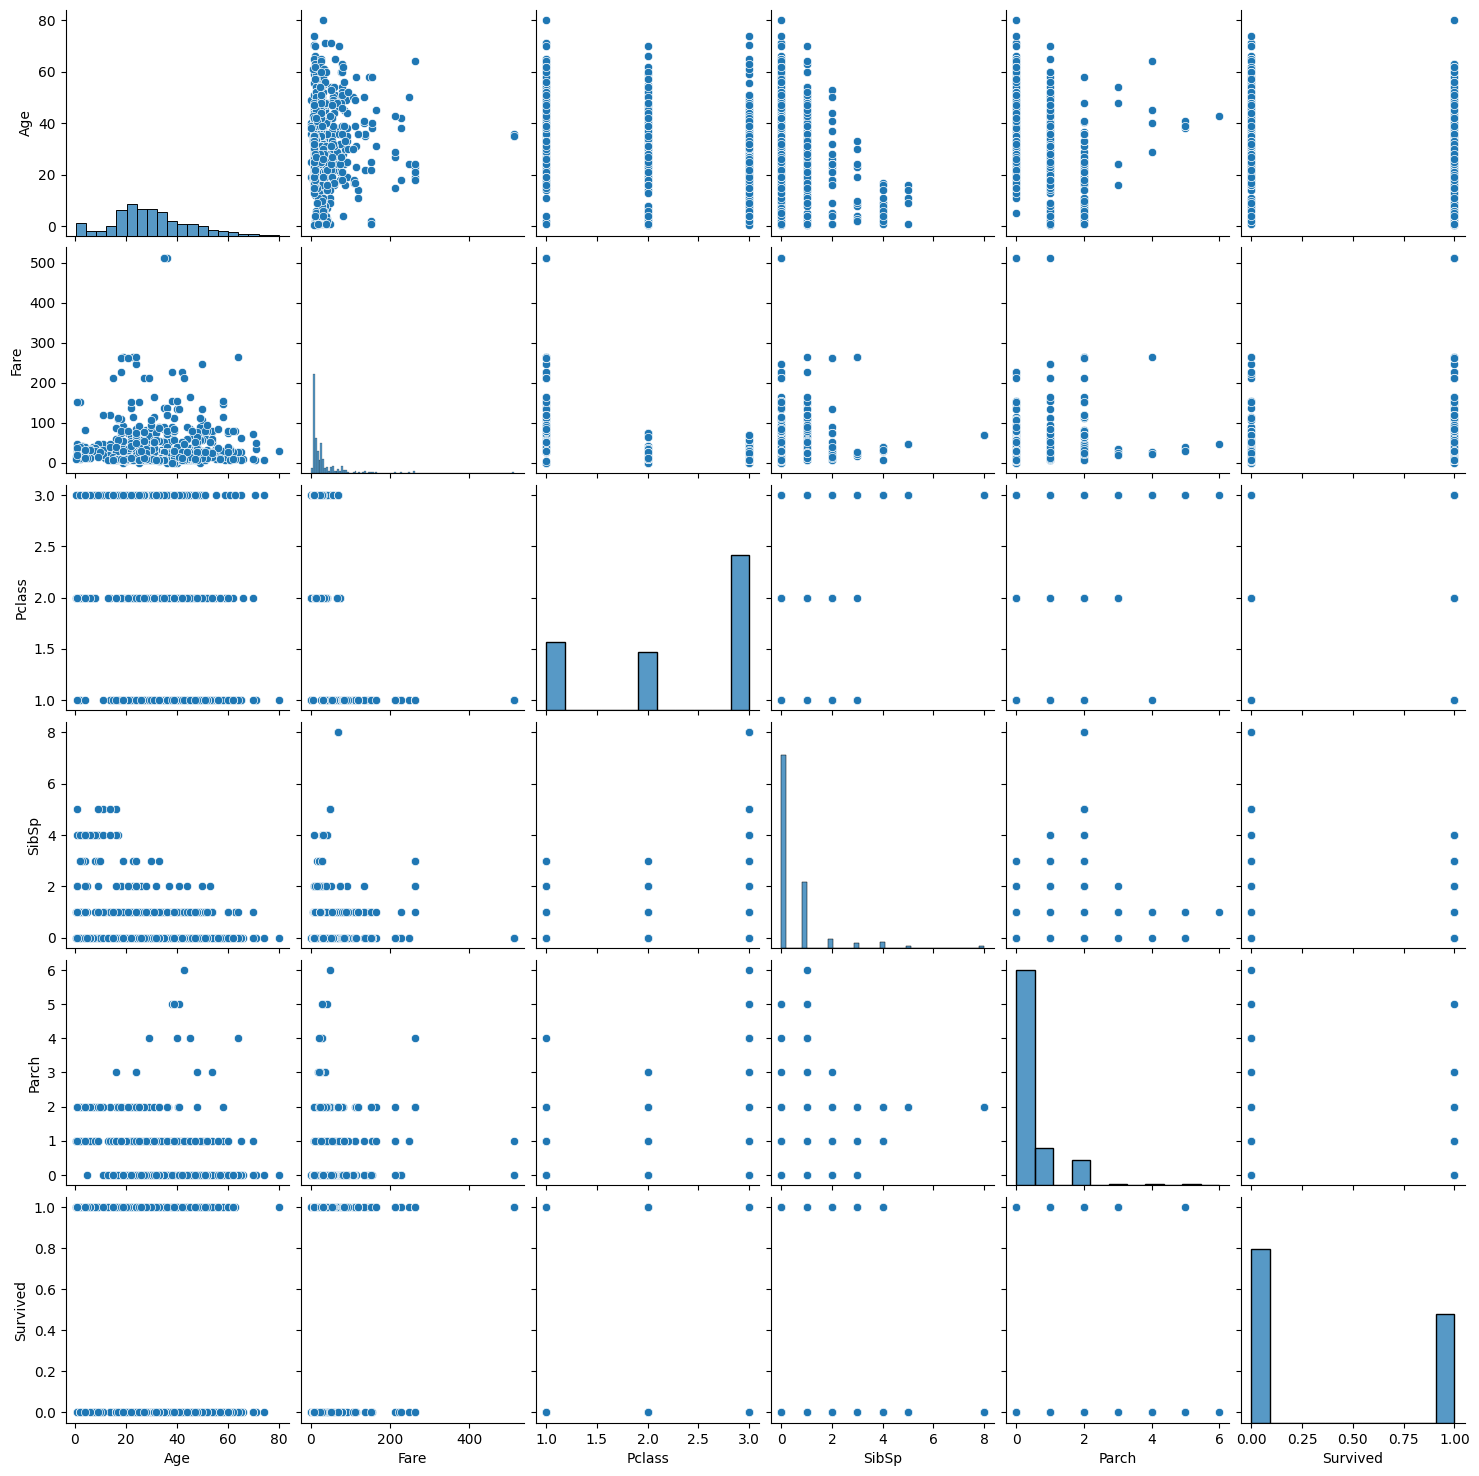

In [16]:
sns.pairplot(train_df[['Age', 'Fare', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Survived']]);

**Как плата за билет (`Fare`) зависит от класса каюты (`Pclass`)? Постройте boxplot.**

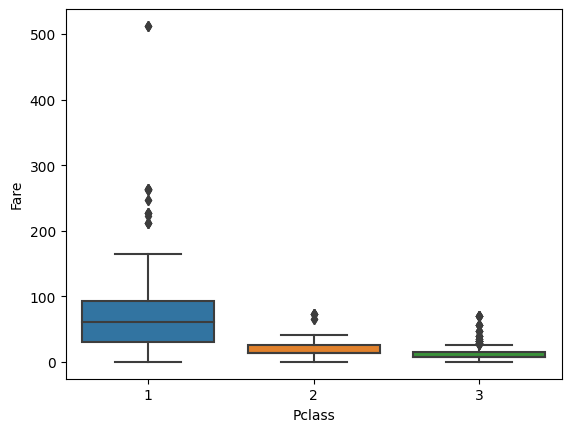

In [24]:
sns.boxplot(data=train_df, x=train_df['Pclass'], y=train_df['Fare']);

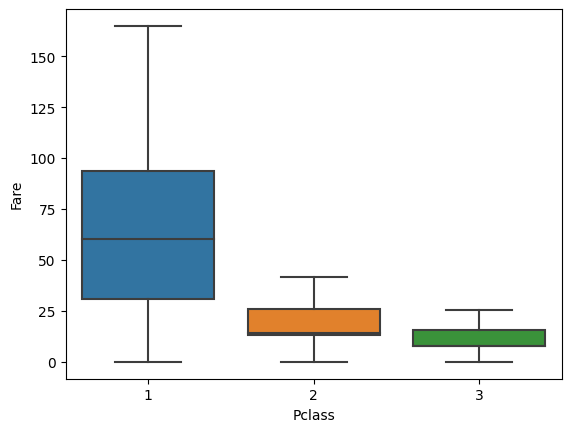

In [118]:
sns.boxplot(data=train_df, x=train_df['Pclass'], y=train_df['Fare'], showfliers=False) ;

**Такой boxplot получается не очень красивым из-за выбросов.** 

**Опционально: создайте признак `Fare_no_out` (стоимости без выбросов), в котором исключаются стоимости, отличающиеся от средней по классу более чем на 2 стандартных отклонения. Важно: надо исключать выбросы именно в зависимости от класса каюты. Иначе исключаться будут только самые большие (1 класс) и малые (3 класс) стоимости.**

In [107]:
double_sd_first_class = train_df[train_df['Pclass'] == 1]['Fare'].std() * 2
double_sd_second_class = train_df[train_df['Pclass'] == 2]['Fare'].std() * 2
double_sd_third_class = train_df[train_df['Pclass'] == 3]['Fare'].std() * 2

median_first_class = train_df[train_df['Pclass'] == 1]['Fare'].median()
median_second_class = train_df[train_df['Pclass'] == 2]['Fare'].median()
median_third_class = train_df[train_df['Pclass'] == 3]['Fare'].median()

excluded_costs_first_class = median_first_class + double_sd_first_class
excluded_costs_second_class = median_second_class + double_sd_second_class
excluded_costs_third_class = median_third_class + double_sd_third_class

217.04824529345763

In [97]:
train_df['Fare_no_out'] = train_df['Fare']
fare_pclass1 = train_df[train_df['Pclass'] == 1]['Fare']
fare_pclass2 = train_df[train_df['Pclass'] == 2]['Fare']
fare_pclass3 = train_df[train_df['Pclass'] == 3]['Fare']

In [113]:
fare_pclass1_no_out =  fare_pclass1(fare_pclass1 < excluded_costs_first_class) | (fare_pclass1 > excluded_costs_first_class)
# fare_pclass2_no_out = train_df[train_df['Pclass'] == 2]['Fare'] > double_sd_second_class + median_second_class
# fare_pclass3_no_out =  train_df[train_df['Pclass'] == 3]['Fare'] > double_sd_third_class + median_third_class
# train_df['Fare_no_out'] = fare_pclass1_no_out.append(fare_pclass2_no_out).append(fare_pclass3_no_out)

TypeError: 'Series' object is not callable

In [114]:
fare_pclass1

PassengerId
2      71.2833
4      53.1000
7      51.8625
12     26.5500
24     35.5000
        ...   
872    52.5542
873     5.0000
880    83.1583
888    30.0000
890    30.0000
Name: Fare, Length: 216, dtype: float64

In [115]:
type(fare_pclass1)

pandas.core.series.Series

In [116]:
fare_pclass1_no_out

PassengerId
2      True
4      True
7      True
12     True
24     True
       ... 
872    True
873    True
880    True
888    True
890    True
Name: Fare, Length: 216, dtype: bool

In [112]:
type(fare_pclass1_no_out)

pandas.core.series.Series

In [61]:
np.where(train_df[train_df['Pclass'] == 1]['Fare'] > 50)

(array([  0,   1,   2,   5,   7,   8,   9,  10,  11,  13,  14,  17,  18,
         20,  21,  22,  23,  24,  26,  27,  28,  29,  30,  38,  40,  41,
         42,  43,  44,  45,  47,  48,  49,  50,  52,  53,  56,  58,  59,
         61,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  75,
         76,  77,  78,  80,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  95,  96,  97,  98, 102, 104, 108, 109, 110, 114,
        115, 116, 117, 120, 122, 123, 124, 126, 128, 129, 131, 134, 135,
        136, 138, 139, 141, 142, 143, 144, 148, 149, 151, 155, 156, 158,
        159, 161, 162, 163, 164, 165, 166, 168, 169, 172, 175, 176, 177,
        178, 179, 181, 182, 183, 184, 185, 186, 187, 189, 190, 192, 195,
        197, 199, 201, 202, 205, 207, 210, 211, 213], dtype=int64),)

In [69]:
fare_pclass1

PassengerId
2      71.2833
4      53.1000
7      51.8625
12     26.5500
24     35.5000
        ...   
872    52.5542
873     5.0000
880    83.1583
888    30.0000
890    30.0000
Name: Fare, Length: 216, dtype: float64

In [70]:
fare_pclass1_no_out

PassengerId
2      False
4      False
7      False
12     False
24     False
       ...  
872    False
873    False
880    False
888    False
890    False
Name: Fare, Length: 216, dtype: bool

In [72]:
fare_pclass2

PassengerId
10     30.0708
16     16.0000
18     13.0000
21     26.0000
22     13.0000
        ...   
867    13.8583
875    24.0000
881    26.0000
884    10.5000
887    13.0000
Name: Fare, Length: 184, dtype: float64

In [71]:
train_df['Fare_no_out']

PassengerId
1       7.2500
2      71.2833
3       7.9250
4      53.1000
5       8.0500
        ...   
887    13.0000
888    30.0000
889    23.4500
890    30.0000
891     7.7500
Name: Fare_no_out, Length: 891, dtype: float64

**Каково соотношение погибших и выживших в зависимости от пола? Отобразите c помощью Seaborn.countplot c аргументом hue.**

In [ ]:
# Ваш код здесь

**Каково соотношение погибших и выживших в зависимости от класса каюты? Отобразите c помощью Seaborn.countplot c аргументом hue.**

In [ ]:
# Ваш код здесь

**Как факт выживания зависит от возраста пассажира? Проверьте (графически) предположение, что молодые чаще выживали. Пусть, условно, молодые - младше 30 лет, пожилые – старше 60 лет.**

In [ ]:
# Ваш код здесь